In [145]:
## Enter your full name ##
name = 'Behzad Moloudi'
grade = 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import io
import requests
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset

# URL to the dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

# Download the dataset as a zip file
response = requests.get(data_url)

# Open the downloaded zip file in memory
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Read the CSV file inside the zip archive into a pandas DataFrame
data_path = 'bank-additional/bank-additional-full.csv'
df = pd.read_csv(zip_file.open(data_path), sep=';')  # Read the CSV file into a DataFrame

# Display the first few rows of the dataset to check if it has been loaded correctly
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Explore the data

# Show data types, column names, and if there are any missing values
df.info()

# Show summary statistics (average, minimum, maximum) for numerical columns
df.describe()

# Check if there are any missing values in the dataset
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [21]:
# Handle missing values (e.g., replace missing values with the mean of the column)

# Handling 'unknown' values in categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Replace 'unknown' in each categorical column with the most frequent value (mode)
for col in categorical_columns:
    df[col] = df[col].replace('unknown', df[col].mode()[0])

# Check if 'unknown' has been handled
df[categorical_columns].isnull().sum()


# Step 1: Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Check for missing values in the numerical columns before applying the fillna operation
missing_values = df[numerical_cols].isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Step 3: Fill missing values only in columns that have missing data
numerical_cols_with_missing = missing_values[missing_values > 0].index
df[numerical_cols_with_missing] = df[numerical_cols_with_missing].apply(lambda col: col.fillna(col.mean()))

# Step 4: Confirm that missing values have been handled
print(df[numerical_cols_with_missing].isnull().sum())  # Check if all missing values are filled



Columns with missing values:
Series([], dtype: int64)
Series([], dtype: float64)


In [23]:
# Split data into training and testing sets

# 1. Separate features (X) and target (y)
X = df.drop('y', axis=1)  # X contains all columns except the target column 'y'
y = df['y']  # y contains the target column (whether the customer subscribed)

# 2. Split the preprocessed data into training and testing sets
# 80% of the data is used for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Check the shape of the training and testing sets
print(X_train.shape)  # Shape of X_train (features used for training)
print(X_test.shape)   # Shape of X_test (features used for testing)
print(y_train.shape)  # Shape of y_train (target for training)
print(y_test.shape)   # Shape of y_test (target for testing)


(32950, 20)
(8238, 20)
(32950,)
(8238,)


In [25]:
# Encoding categorical features (e.g., one-hot encoding)

# One-Hot Encoding for categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Check the first few rows after encoding
X_train.head()

,age,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
12556,40,mon,94,2,999,0,1.4,93.918,-42.7,4.960,...,False,True,False,False,False,False,False,False,True,False
35451,31,mon,116,4,999,0,-1.8,92.893,-46.2,1.244,...,False,False,False,False,True,False,False,False,True,False
30592,59,mon,13,6,999,1,-1.8,92.893,-46.2,1.354,...,False,False,False,False,True,False,False,False,False,False
17914,43,tue,94,5,999,0,1.4,93.918,-42.7,4.961,...,False,True,False,False,False,False,False,False,True,False
3315,39,thu,344,2,999,0,1.1,93.994,-36.4,4.860,...,False,False,False,False,True,False,False,False,True,False


In [27]:
# Data Scaling (normalize numerical features)

# List of numerical columns that need scaling
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features in both training and testing sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Display the first few rows of the scaled data
X_train.head()

,age,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
12556,-0.001669,mon,-0.631114,-0.206242,0.194661,-0.350902,0.838794,0.589080,-0.472769,0.771354,...,False,True,False,False,False,False,False,False,True,False
35451,-0.864095,mon,-0.546321,0.513676,0.194661,-0.350902,-1.199440,-1.180760,-1.229916,-1.372028,...,False,False,False,False,True,False,False,False,True,False
30592,1.819007,mon,-0.943306,1.233593,0.194661,1.677559,-1.199440,-1.180760,-1.229916,-1.308581,...,False,False,False,False,True,False,False,False,False,False
17914,0.285806,tue,-0.631114,0.873635,0.194661,-0.350902,0.838794,0.589080,-0.472769,0.771930,...,False,True,False,False,False,False,False,False,True,False
3315,-0.097494,thu,0.332441,-0.206242,0.194661,-0.350902,0.647709,0.720307,0.890097,0.713674,...,False,False,False,False,True,False,False,False,True,False


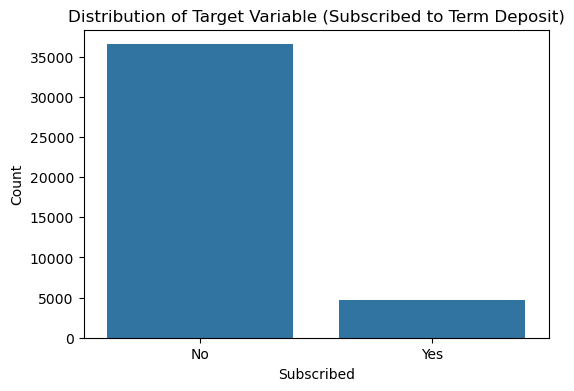

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (Subscribed to Term Deposit)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()


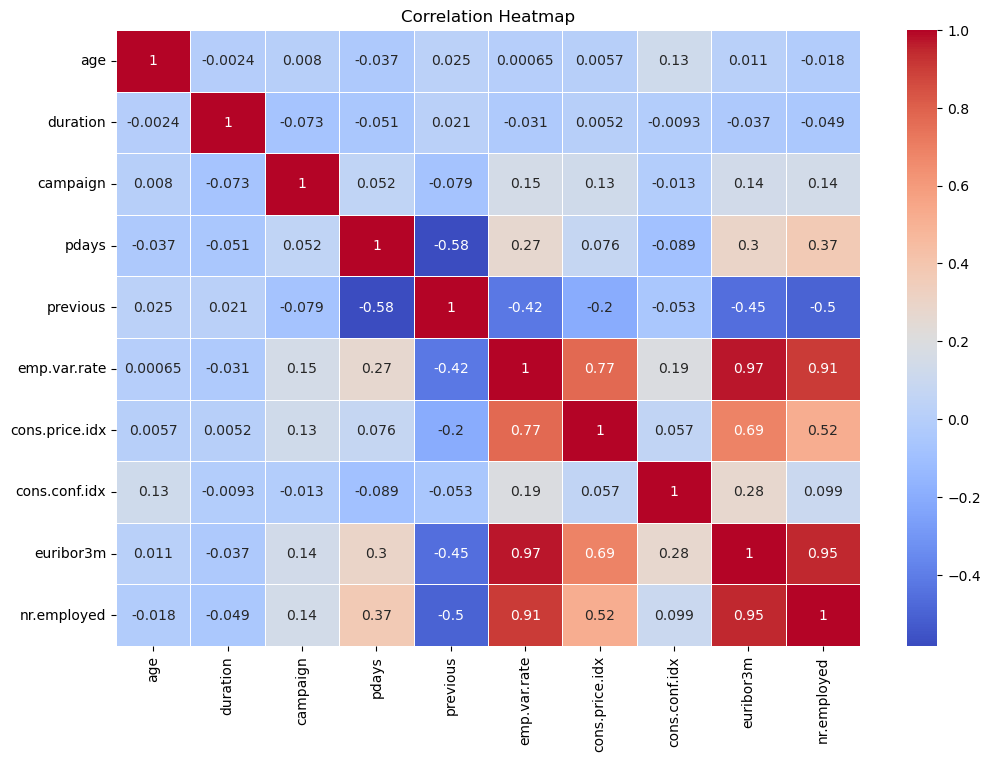

In [29]:
# Data Visualization (e.g., histograms, box plots, and correlation matrices)

# the size of the heatmap
plt.figure(figsize=(12, 8))

# Create a correlation matrix
corr_matrix = X_train[numerical_cols].corr()

# Plot the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



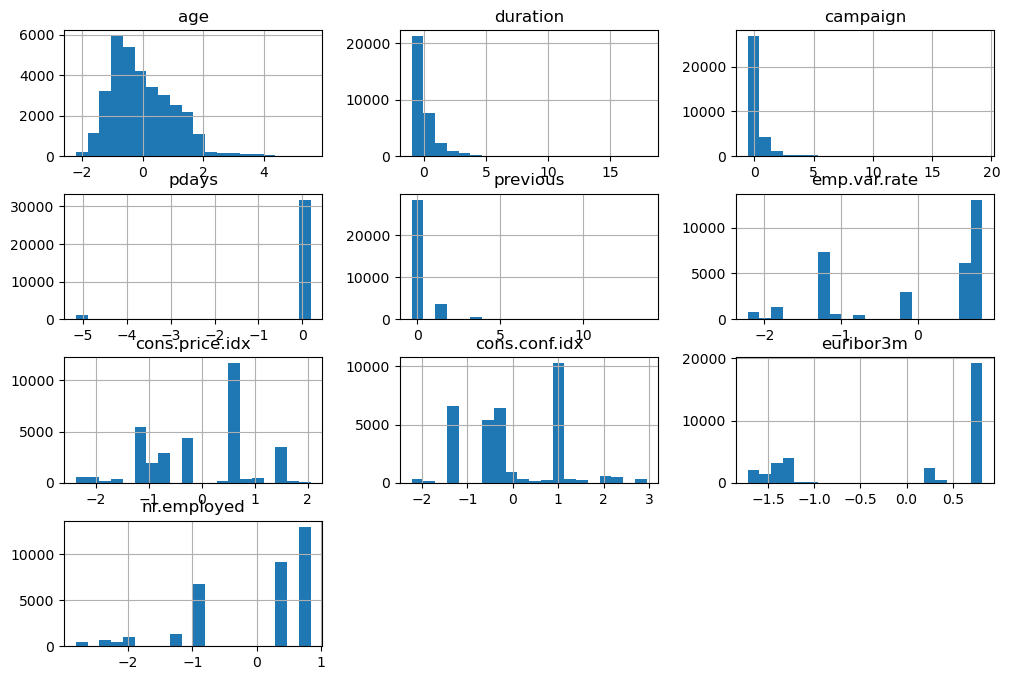

In [31]:
# Plot histograms for the numerical columns
X_train[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.show()
